In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [6]:
data = pd.read_csv(r"C:\Users\akars\OneDrive\Desktop\5th SEM\DATA VISUALIZATION, ANALYTICS\LAB\DataSet\Drug200.csv")

In [7]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [8]:
data.info

<bound method DataFrame.info of      Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  drugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  drugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]>

In [9]:
x = data.drop(["Drug"], axis=1)
y = data["Drug"]

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33, random_state = 42)

In [11]:
x_train.shape, x_test.shape

((134, 5), (66, 5))

In [12]:
x_train.head()

,Age,Sex,BP,Cholesterol,Na_to_K
42,50,M,NORMAL,NORMAL,15.790
189,64,M,HIGH,NORMAL,20.932
90,62,M,NORMAL,HIGH,16.594
136,55,F,HIGH,HIGH,10.977
51,67,M,NORMAL,NORMAL,10.898


In [13]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Sex', "BP", "Cholesterol"])
x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)


In [14]:
clf_gini = DecisionTreeClassifier(criterion ='gini',max_depth=3,random_state=0)
clf_gini.fit(x_train, y_train)
y_pred_gini = clf_gini.predict(x_test)

In [15]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
y_pred_train_gini = clf_gini.predict(x_train)
y_pred_train_gini
print("Training=set accuracy score: (0:0.4f)". format(accuracy_score(y_train,y_pred_train_gini)))

Model accuracy score with criterion gini index: 0.8485
Training=set accuracy score: (0:0.4f)


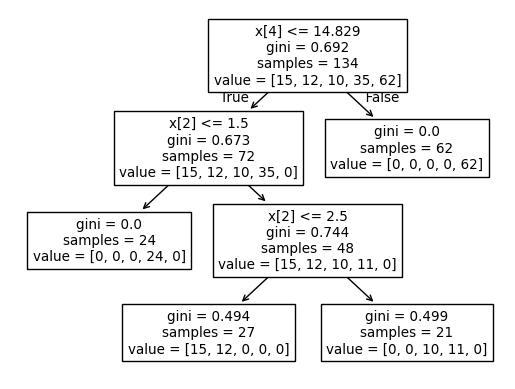

In [16]:
# from sklearn import tree plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(x_train, y_train))
plt.show()

Model accuracy score with criterion entropy: 0.8485
Training-set accuracy score: (0:0.4f)


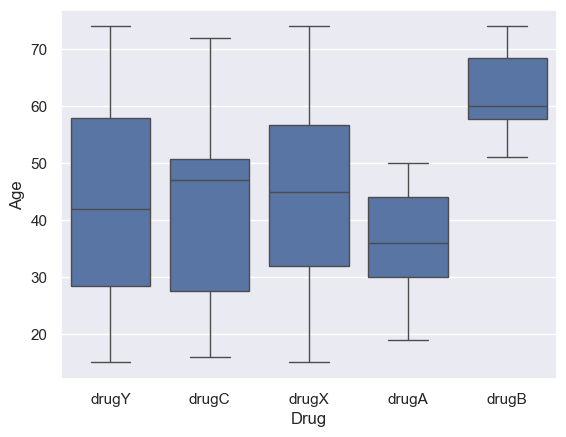

In [17]:
#instantiate the DecisionTreeClassifier model with criterion entropy
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
#fit the model
clf_en.fit(x_train, y_train)
y_pred_en = clf_en.predict(x_test)
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
y_pred_train_en= clf_en.predict(x_train)

y_pred_train_en

print('Training-set accuracy score: (0:0.4f)'. format(accuracy_score(y_train, y_pred_train_en)))

sns.set_theme(style="darkgrid")
sns.boxplot(x="Drug", y="Age",  data=data)

plt.show()